# <center> CIMAT - INEGI: Sesión de Dudas II <center>
<center> Maestría en Análisis Estadístico y Computación <center>
<center> Profesores: Dr. Johan Van Horebeek y Dr. Víctor Muñiz Sánchez <center>
<center> Ayudante: Gabriel Alejandro Aguilar Farrera <center>

In [1]:
# Cargamos las librerías necesarias
import pandas as pd              # Cargar y manipular datos (..xlsx o .csv)
import matplotlib.pyplot as plt  # Visualización de datos
import numpy as np               # Manipulación de matrices y cálculos en general
import seaborn as sns            # Visualización de datos

%config InlineBackend.figure_format = 'retina'     # Mejorar calidad de los gráficos/imágenes

# Librerias par crear datos artificiales
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles 

# Librerias para realizar clustering
from sklearn.cluster import KMeans                      # Clustering KMeans
from sklearn.cluster import SpectralClustering          # Spectral Clustering
from sklearn.cluster import AgglomerativeClustering     # Cluster jerárquico o aglomerativo
import scipy.cluster.hierarchy as shc                   # Dendograma

# Imágenes
from IPython.display import Image, display         

# Ignorar todos los warnings
import warnings
warnings.filterwarnings("ignore")

# Parte I: Crear datos artificiales usando librerías

##### Creando Datos artificiales

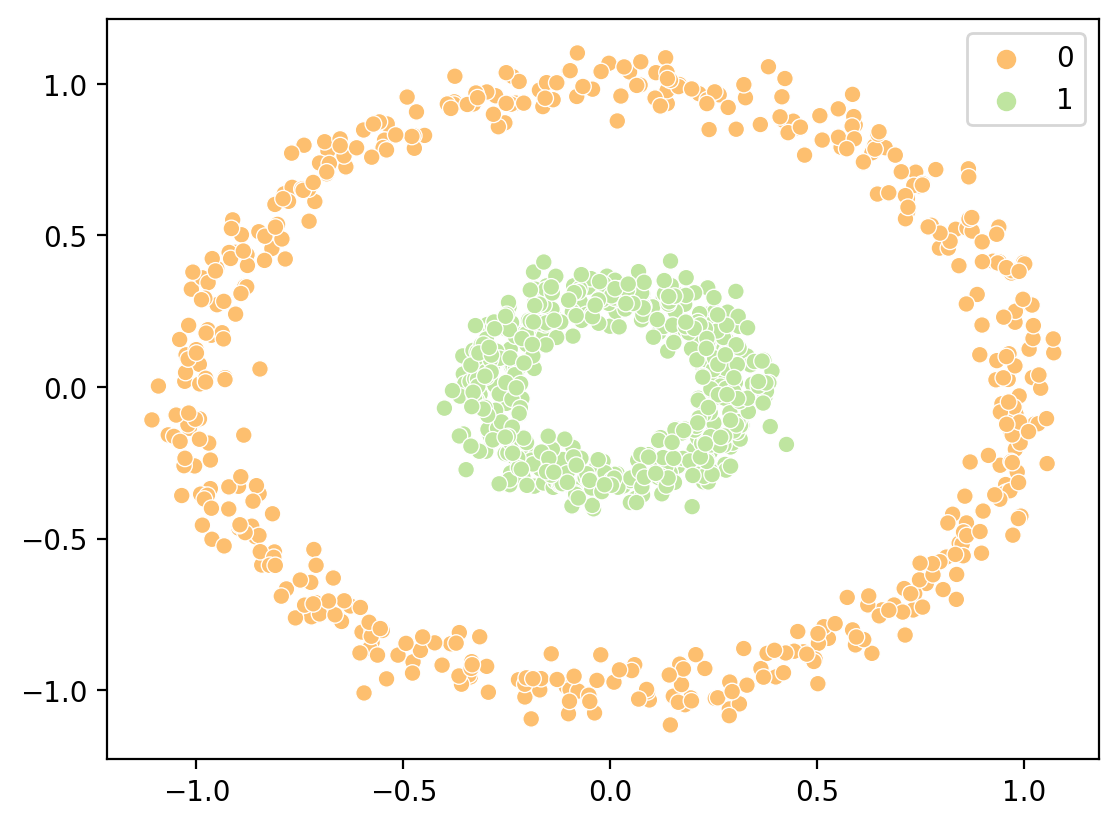

In [2]:
# Datos circulares
X_circles, y_circles = make_circles(n_samples = 1000,
                                    noise = 0.05,
                                    factor = 0.3)

sns.scatterplot(data = X_circles, x = X_circles[:,0], y = X_circles[:,1],
                hue = y_circles, alpha = 1.0,
                palette="Spectral", legend = True)

Circles = pd.DataFrame(data = X_circles, columns =  ['Feature 1', 'Feature 2'])

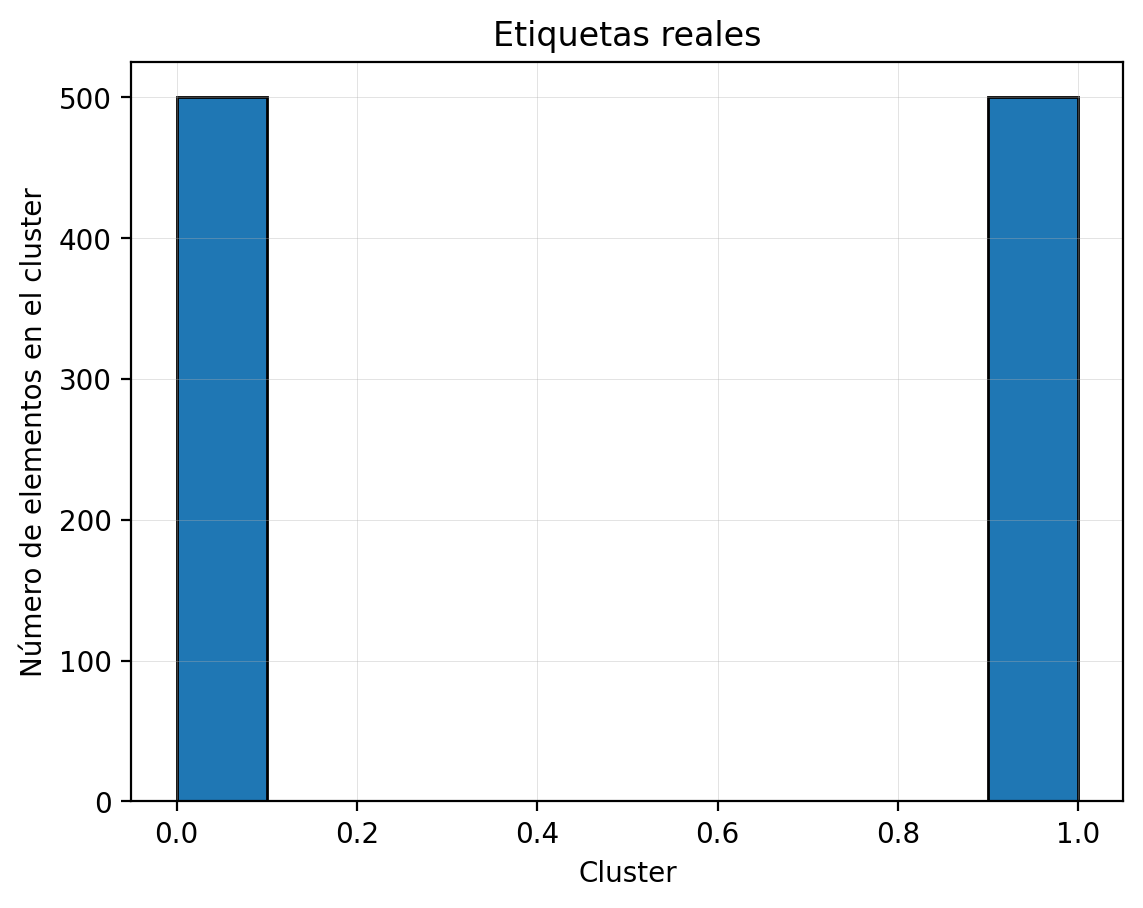

In [3]:
plt.hist(pd.Series(y_circles), edgecolor = 'black')
plt.xlabel('Cluster')
plt.ylabel('Número de elementos en el cluster')
plt.title('Etiquetas reales')
plt.grid(True, linewidth=0.25, alpha=0.5)

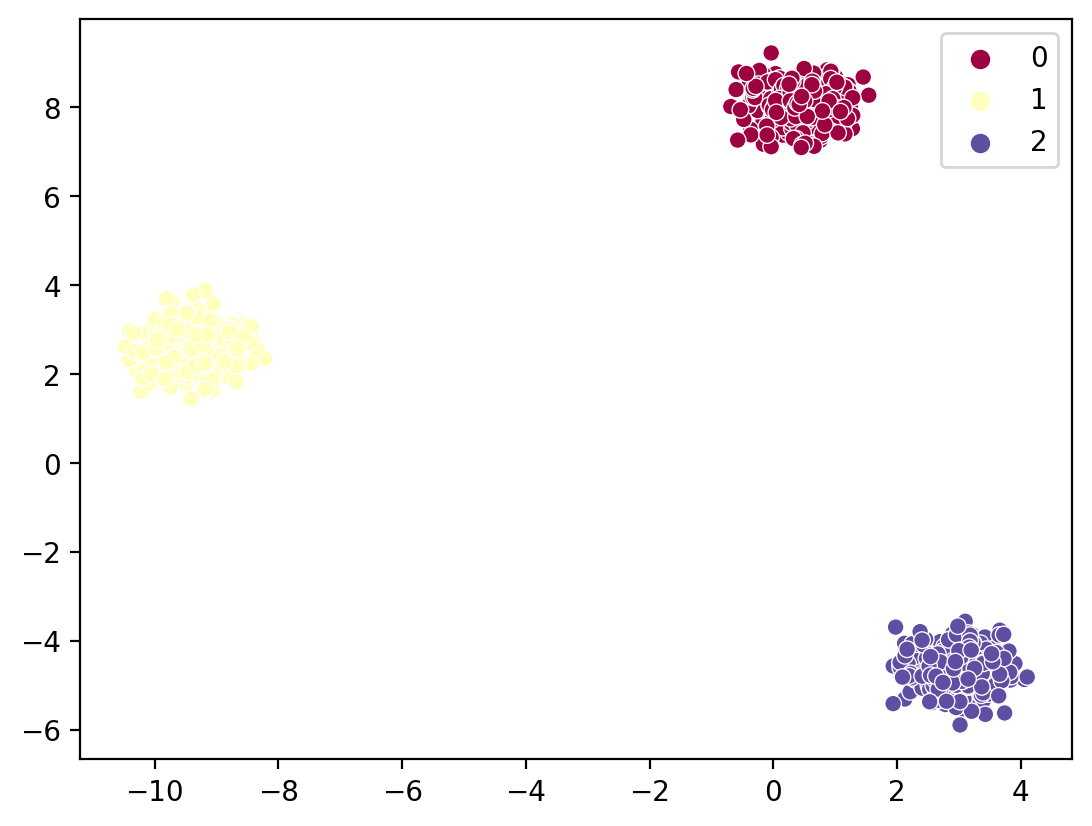

In [4]:
# Datos blobs
X_blobs, y_blobs = make_blobs(n_samples = 1000,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.4)

sns.scatterplot(data = X_blobs, x = X_blobs[:,0], y = X_blobs[:,1],
                hue = y_blobs, alpha = 1.0,
                palette="Spectral", legend = True)

Blobs = pd.DataFrame(data = X_blobs, columns =  ['Feature 1', 'Feature 2'])

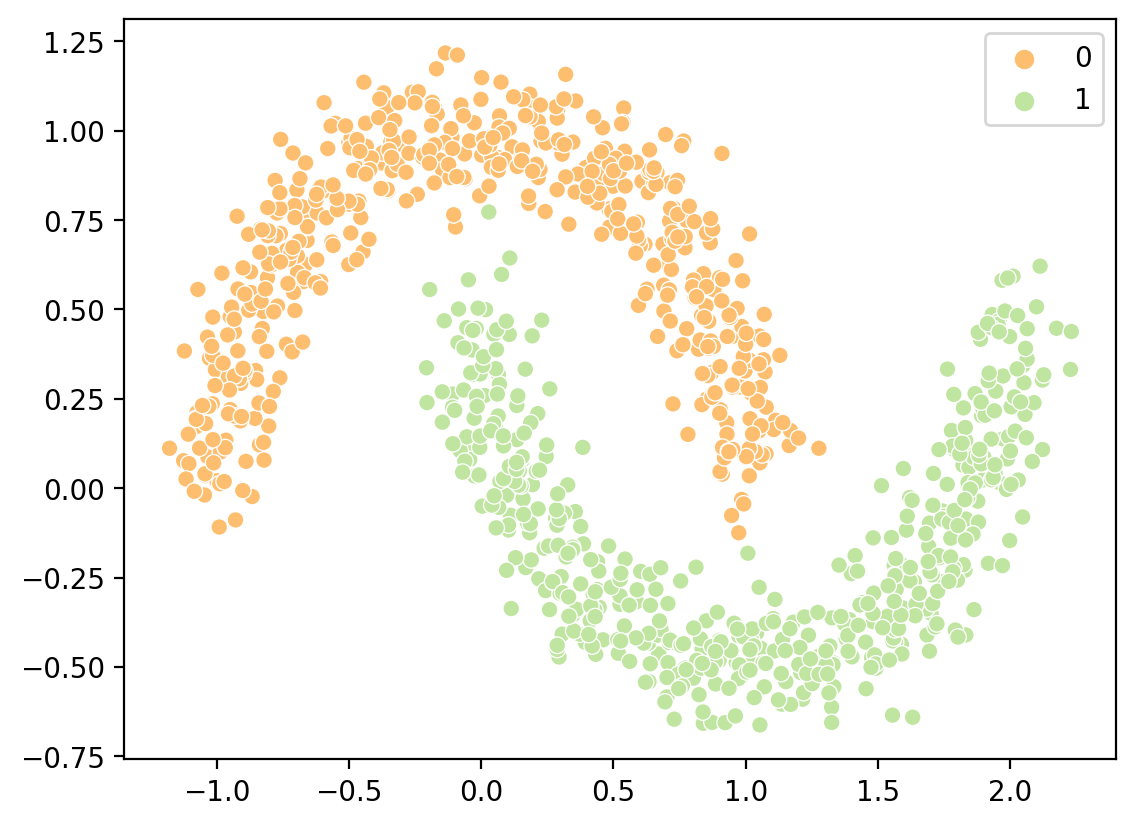

In [5]:
# Datos de luna
X_moons, y_moons = make_moons(n_samples = 1000,
                              noise = 0.1)

sns.scatterplot(data = X_moons, x = X_moons[:,0], y = X_moons[:,1],
                hue = y_moons, alpha = 1.0,
                palette="Spectral", legend = True)

Moons = pd.DataFrame(data = X_moons, columns =  ['Feature 1', 'Feature 2'])

# Parte II: K Means

##### Aplicando KMeans a los datos de círculos

In [6]:
Circles

,Feature 1,Feature 2
0,0.861008,-0.448268
1,0.290734,-0.197758
2,0.557959,0.791147
3,0.467068,-0.873479
4,0.901133,-0.409193
...,...,...
995,0.233533,0.935106
996,-0.286963,0.105483
997,-0.292506,0.130978
998,-0.334708,-0.064635


In [7]:
# Cargamos el objeto kmeans
kmeans = KMeans(n_clusters = 2,
                init='k-means++',
                n_init='auto',
                random_state = None,
                max_iter = 850)

# 'k-means++': selecciona los centroides iniciales del clúster mediante un muestreo
# basado en una distribución de probabilidad empírica de la contribución de los puntos
# a la inercia general. 
# 'n_init': Número de veces que se ejecuta el algoritmo k-means con un centroide diferente semillas.
# El resultado final es el mejor resultado de las ejecuciones consecutivas en términos de inercia. 

# Ajustamos los datos al modelo
kmeans.fit(Circles)
# Agregamos una columna nueva con las etiquetas de kmeans
Circles['KMeansCluster'] = kmeans.labels_
print('Los centroides son: \n', kmeans.cluster_centers_)
print('La incercia tiene un valor de: ', kmeans.inertia_)
# 'inertia_': Suma de las distancias al cuadrado de las muestras al centro de su cúmulo más cercano

Los centroides son: 
 [[-0.4189478   0.04441574]
 [ 0.40670794 -0.04344656]]
La incercia tiene un valor de:  378.5269032769699


Text(0.5, 1.0, 'KMeans')

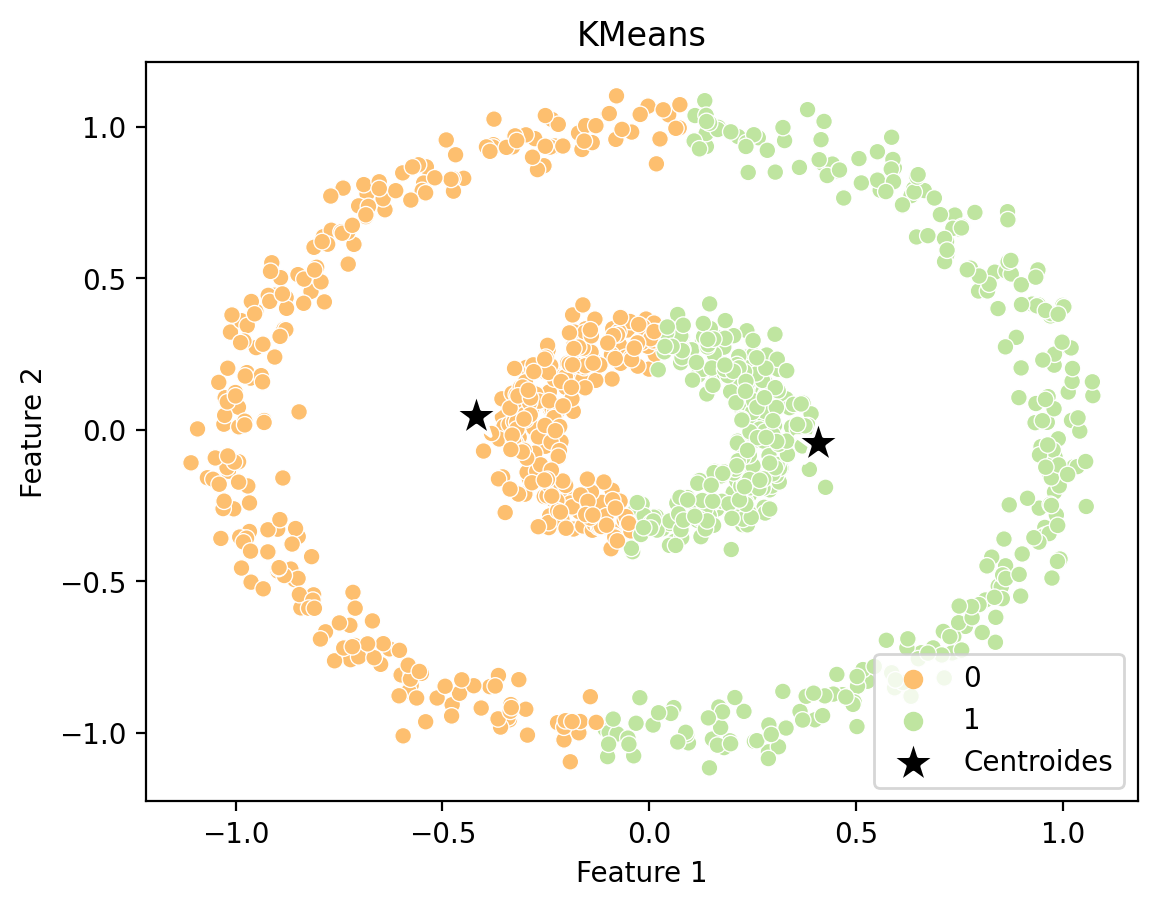

In [8]:
sns.scatterplot(data = Circles, x = 'Feature 1', y = 'Feature 2',
                hue = 'KMeansCluster', alpha = 1.0,
                palette="Spectral", legend = True)

sns.scatterplot(kmeans.cluster_centers_[:,0],
                kmeans.cluster_centers_[:,1],
                marker='*', s=300, color='black', label='Centroides')
plt.title('KMeans')

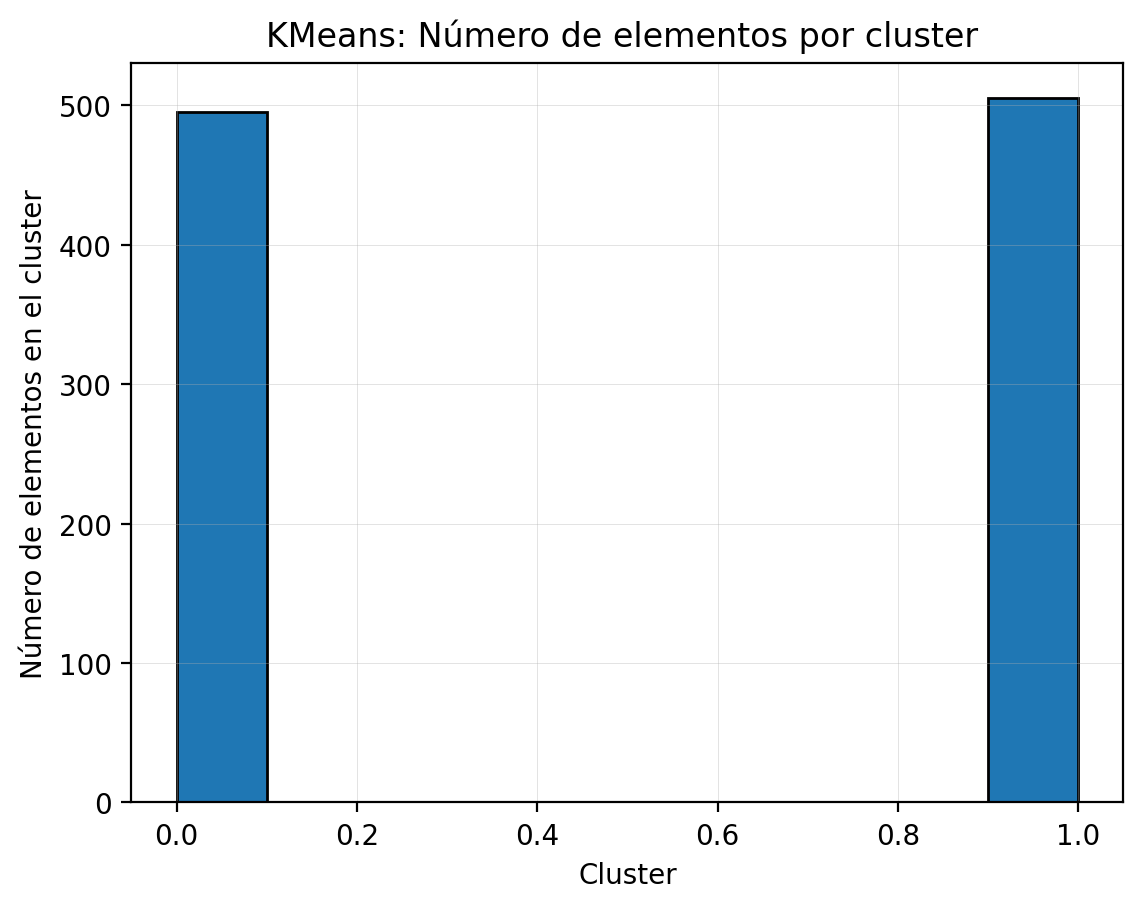

In [9]:
plt.hist(pd.Series(Circles['KMeansCluster']), edgecolor = 'black')
plt.xlabel('Cluster')
plt.ylabel('Número de elementos en el cluster')
plt.title('KMeans: Número de elementos por cluster ')
plt.grid(True, linewidth=0.25, alpha=0.5)

KMeans funciona bien cuando el conjunto de datos tiene la forma de cúmulos (clusters) hiperesféricos.

# Parte III: Clustering Spectral

Paso 1: Construir un grafo de similaridad.

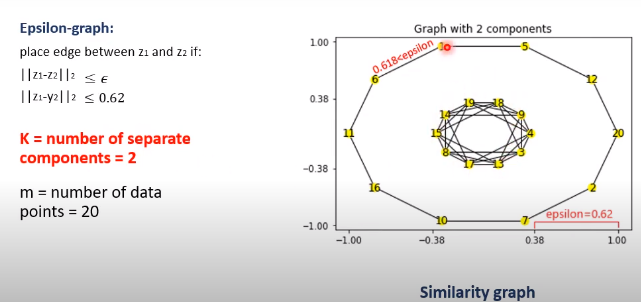

In [10]:
# Ruta de la imagen
imagen_1 = 'Paso1.png'
# Mostrar la imagen
display(Image(filename=imagen_1))

Paso 2: Construir la Matriz de Adyacencia (A)

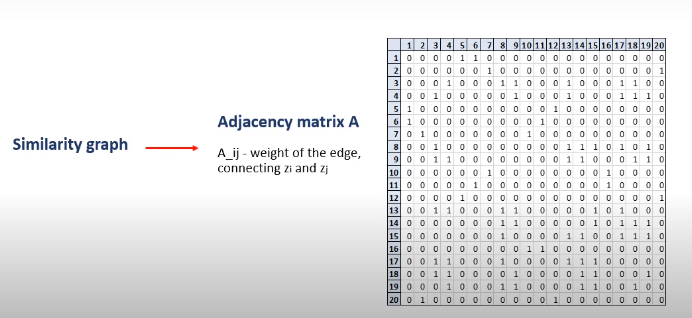

In [11]:
# Ruta de la imagen
imagen_2 = 'Paso2.png'
# Mostrar la imagen
display(Image(filename=imagen_2))

Paso 3: Construir la Matriz Laplaciana (L)

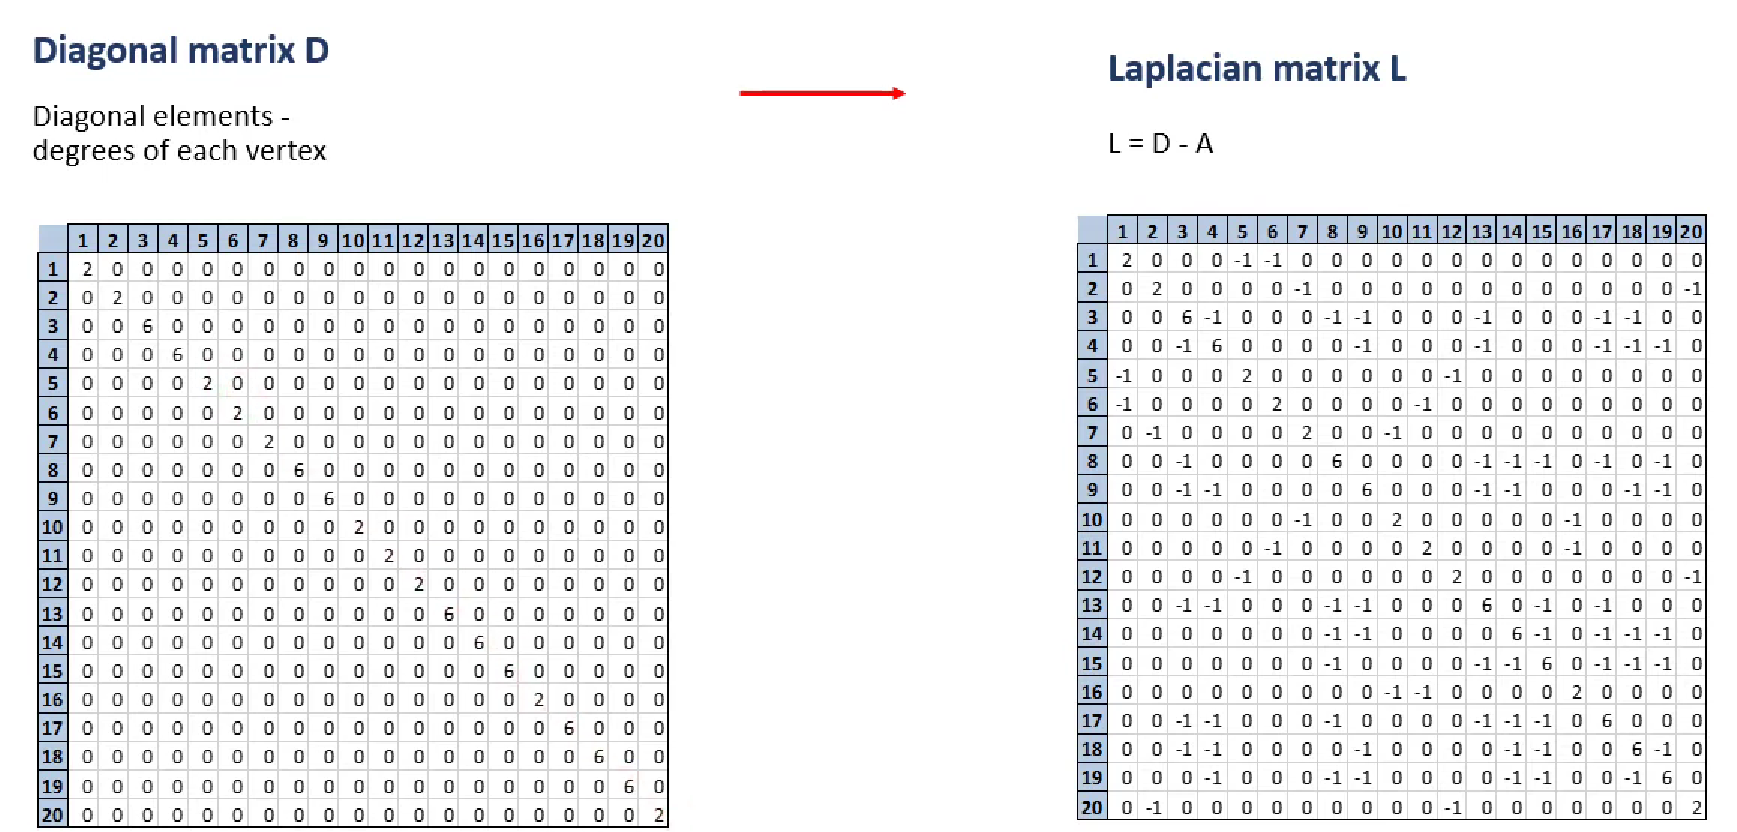

In [12]:
# Ruta de la imagen
imagen_3 = 'Paso3.png'
# Mostrar la imagen
display(Image(filename=imagen_3))

Paso 4: Calcular los valores y vectores propios de L

Paso 5: Me quedo con los vectores propios de los k valores propios más grandes: Incrustar los datos en un espacio de baja dimnesión (spectral embedding), en la cual los grupos son más obvios, con el uso de los eigenvectores de la matriz Laplaciana.

Paso 6: Agrupar los datos en el espacio k-dimensional usando algún algoritmo de clstering (e.g. KMeans).

##### Aplicando Spectral Clustering a los datos de círculos

In [13]:
# Ejemplo
# Cargamos el objeto SpectralClustering
N_clusters = 2
spectral = SpectralClustering(n_clusters = N_clusters,
                affinity = 'nearest_neighbors',
                n_neighbors = 10,
                n_components = N_clusters,
                random_state = None)
# 'nearest_neighbors': Construye la matriz de afinidad calculando un gráfico de los vecinos más cercanos.
# 'rbf': Construye la matriz de afinidad usando una función de base radial (RBF).

# 'n_neighbors': Número de vecinos que se van a utilizar al construir la matriz de afinidad
# utilizando el método de los vecinos más cercanos.

# 'n_componenst': Número de vectores propios que se van a utilizar para la incrustación espectral.
# Si ninguno, El valor predeterminado es 'n_clusters'.

# Ajustamos los datos al modelo
spectral.fit(Circles[['Feature 1', 'Feature 2']])

# Agregamos una columna nueva con las etiquetas de SpectralClustering
Circles['SpectralCluster'] = spectral.labels_

Text(0.5, 1.0, 'Spectral Clustering')

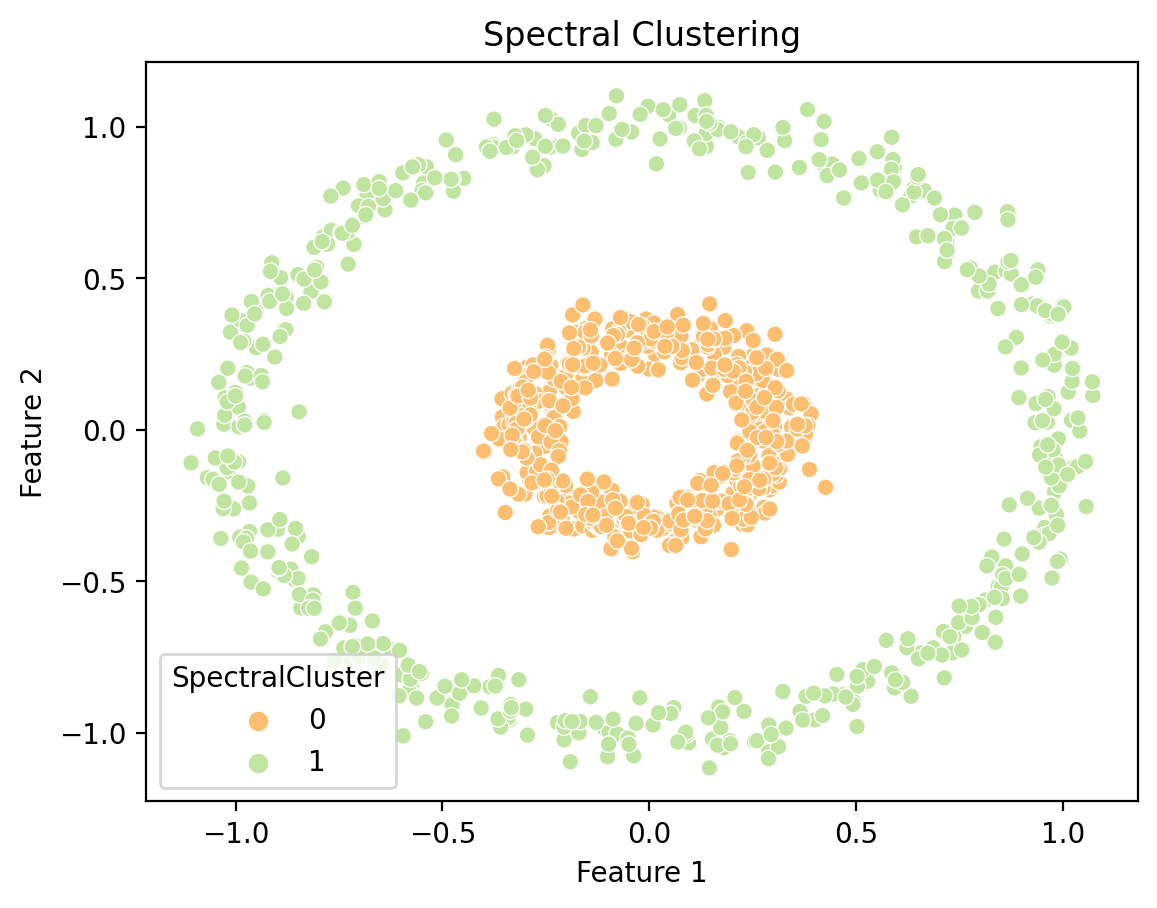

In [14]:
sns.scatterplot(data = Circles, x = 'Feature 1', y = 'Feature 2',
                hue = 'SpectralCluster', alpha = 1.0,
                palette="Spectral", legend = True)

plt.title('Spectral Clustering')

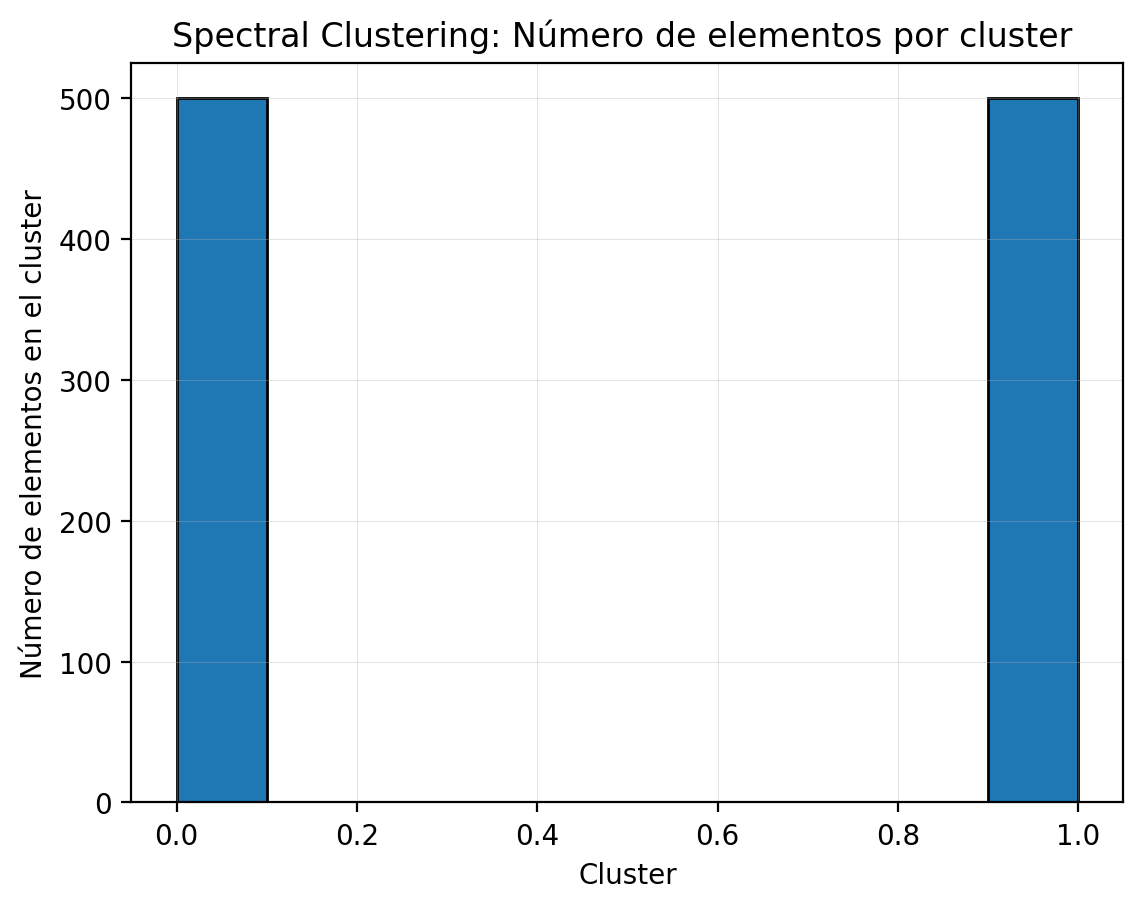

In [15]:
plt.hist(pd.Series(Circles['SpectralCluster']), edgecolor = 'black')
plt.xlabel('Cluster')
plt.ylabel('Número de elementos en el cluster')
plt.title('Spectral Clustering: Número de elementos por cluster ')
plt.grid(True, linewidth=0.25, alpha=0.5)

El clustering spectral no hace asumsiones sobre la forma de los grupos. Mientras que algoritmos como KMeans tiende a encontrar grupos con formas no convexas. Otra observación de KMeans es que requieren un proceso ietrativo para encontrar el mínimo local y son muy sensibles a la inicialización por lo que necesitan múltiples reinicios para obtener clusters de alta calidad.

# Parte IV: Clustering Jerárquico

In [16]:
# Cargamos el objeto AgglomerativeClustering
clustering_jerarquico = AgglomerativeClustering(n_clusters = 2,
                                                linkage = 'ward')

# Ajustamos los datos al modelo
clustering_jerarquico.fit(Circles[['Feature 1', 'Feature 2']]) 

# Agregamos una columna nueva con las etiquetas de SpectralClustering
Circles['AgglomerativeCluster'] = clustering_jerarquico.labels_

Text(0.5, 1.0, 'Agglomerative Clustering')

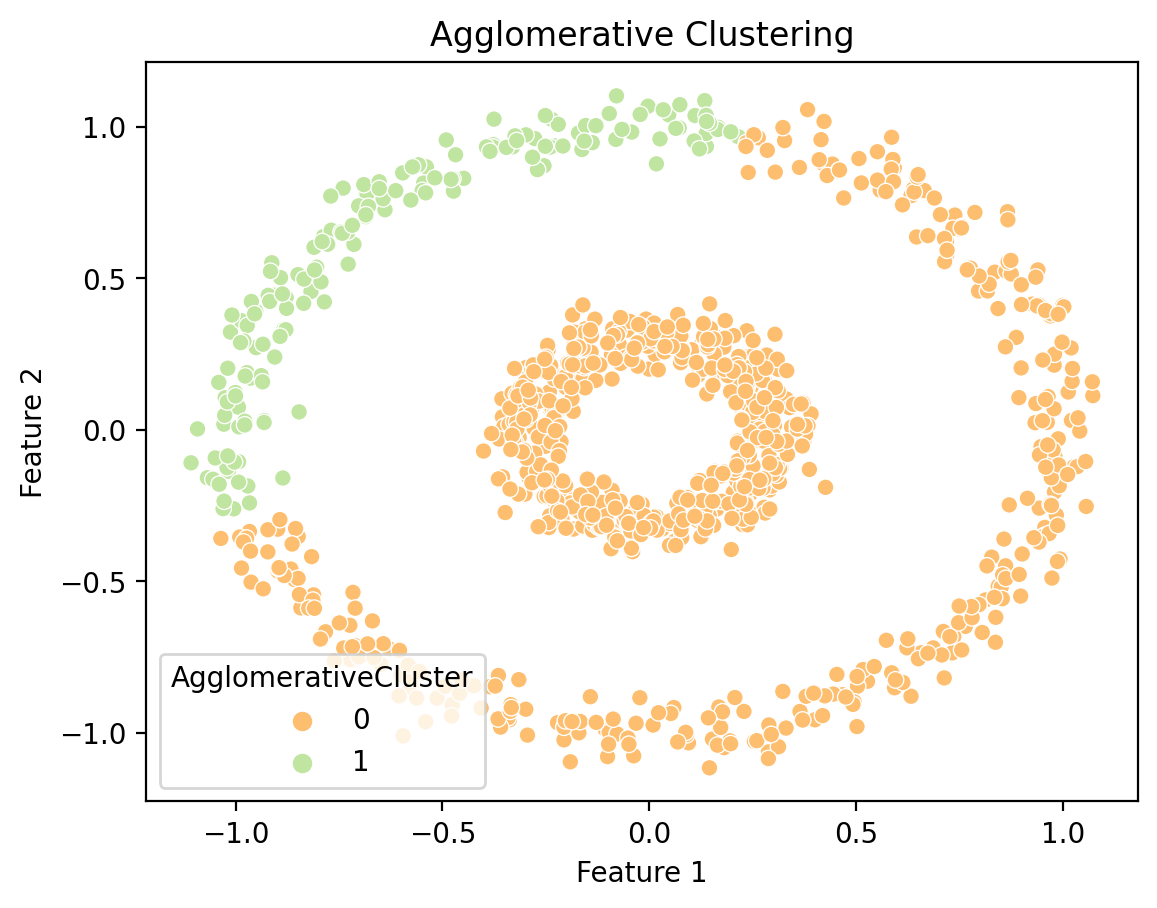

In [17]:
sns.scatterplot(data = Circles, x = 'Feature 1', y = 'Feature 2',
                hue = 'AgglomerativeCluster', alpha = 1.0,
                palette="Spectral", legend = True)

plt.title('Agglomerative Clustering')

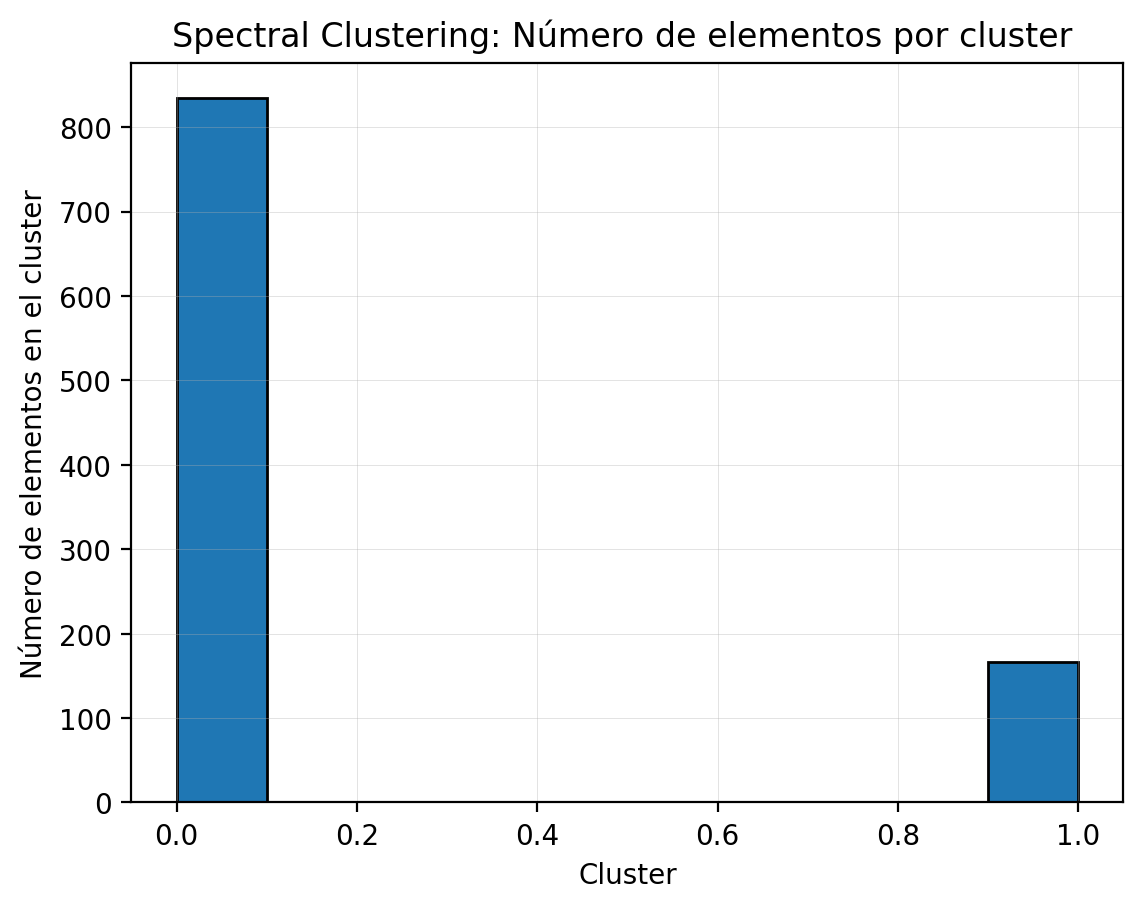

In [18]:
plt.hist(pd.Series(Circles['AgglomerativeCluster']), edgecolor = 'black')
plt.xlabel('Cluster')
plt.ylabel('Número de elementos en el cluster')
plt.title('Spectral Clustering: Número de elementos por cluster ')
plt.grid(True, linewidth=0.25, alpha=0.5)

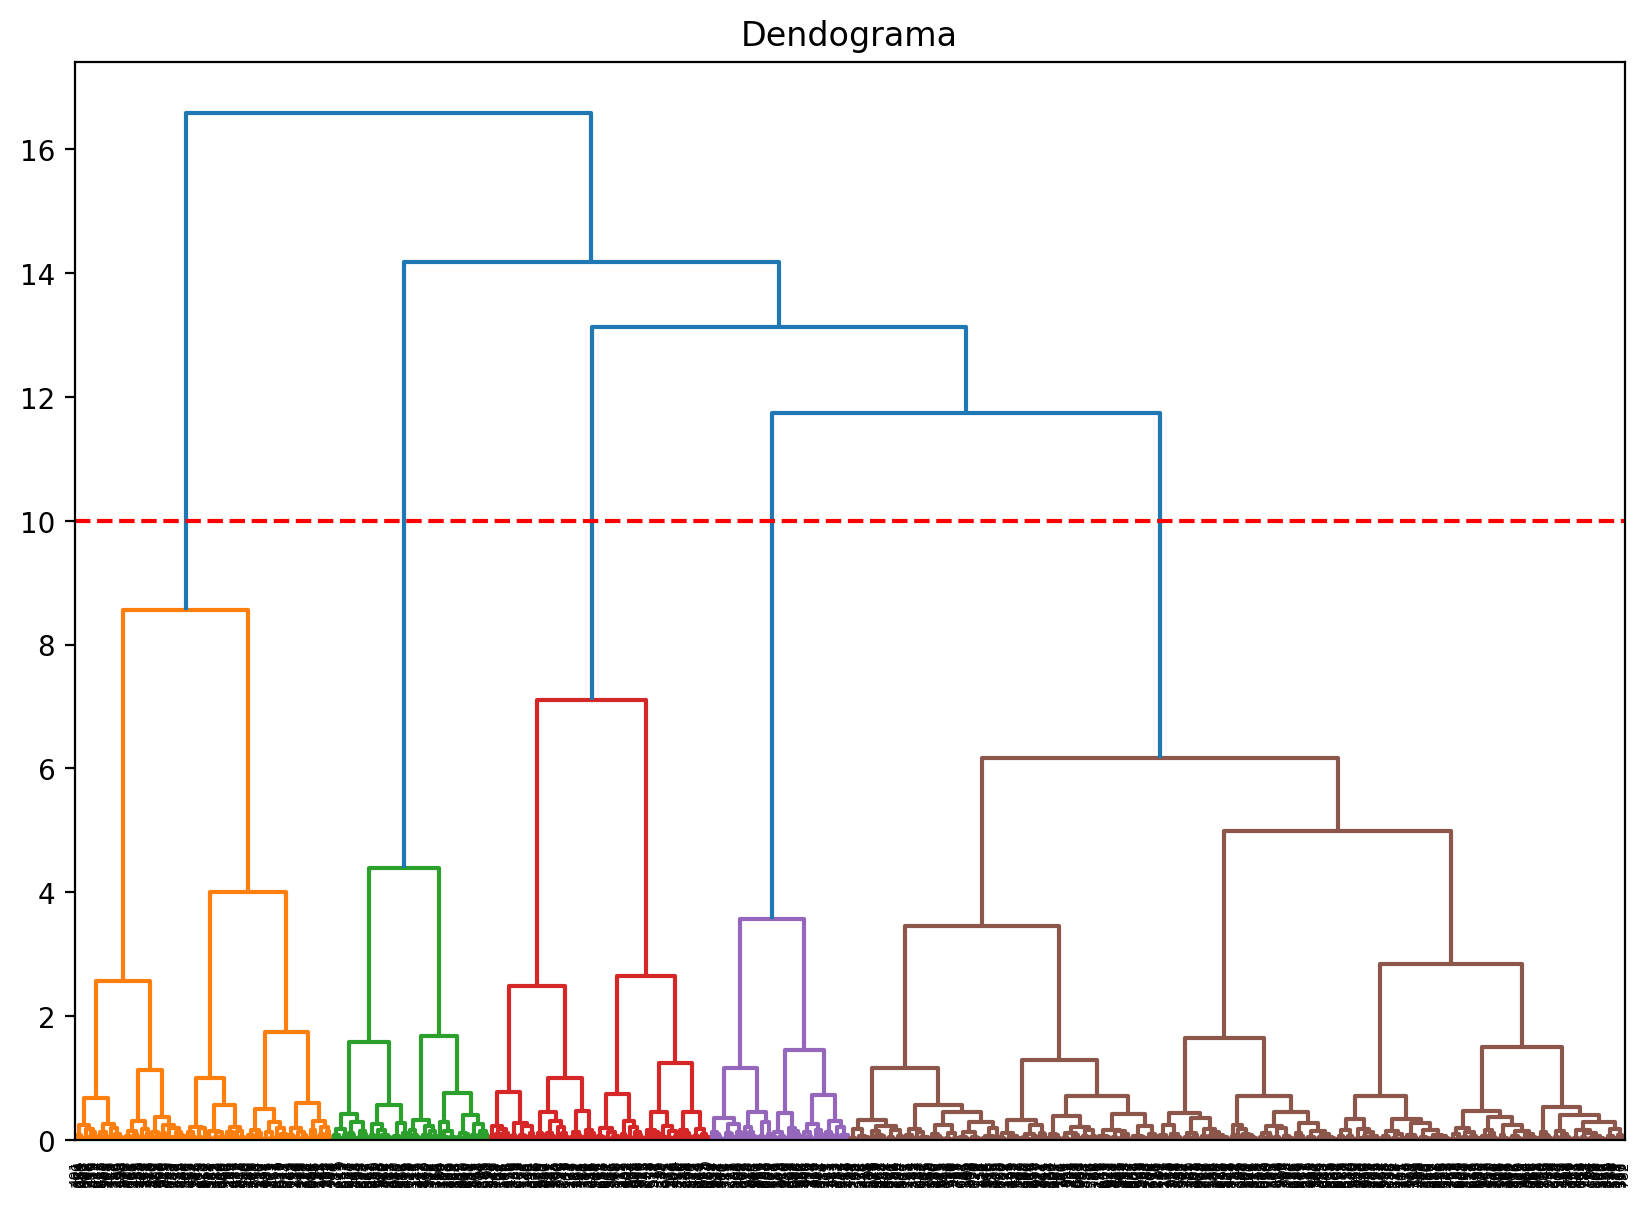

In [19]:
plt.figure(figsize = (10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(Circles[['Feature 1', 'Feature 2']], method = 'ward'))
plt.axhline(y = 10, color = 'red', linestyle = '--' )

# 'ward': Este método minimiza la varianza de los clústeres que se fusionan. 
# 'complete': Este método mide la distancia máxima entre todos los puntos de los dos clústeres que se están fusionando.
# 'average': Este método utiliza la distancia media entre todos los pares de puntos en los dos clústeres que se están fusionando.
# 'single': También conocido como enlace mínimo, este método mide la distancia mínima entre todos los puntos de los dos clústeres
# que se están fusionando.

In [ ]:
plt.figure(figsize = (10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(Circles[['Feature 1', 'Feature 2']], method = 'single'))
plt.axhline(y = 10, color = 'red', linestyle = '--' )

# 'ward': Este método minimiza la varianza de los clústeres que se fusionan. 
# 'complete': Este método mide la distancia máxima entre todos los puntos de los dos clústeres que se están fusionando.
# 'average': Este método utiliza la distancia media entre todos los pares de puntos en los dos clústeres que se están fusionando.
# 'single': También conocido como enlace mínimo, este método mide la distancia mínima entre todos los puntos de los dos clústeres
# que se están fusionando.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_1 = silhouette_score(Circles[['Feature 1', 'Feature 2']], clustering_jerarquico.labels_)
print("Puntuación de silueta:", silhouette_avg_1)

silhouette_avg_2 = silhouette_score(Circles[['Feature 1', 'Feature 2']], kmeans.labels_)
print("Puntuación de silueta:", silhouette_avg_2)

silhouette_avg_3 = silhouette_score(Circles[['Feature 1', 'Feature 2']], spectral.labels_)
print("Puntuación de silueta:", silhouette_avg_3)